В проекте используются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Цель -- выявить определяющие успешность игры закономерности

# Предобработка

**Предобработка. Анализ**

In [1]:
%matplotlib inline
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import numpy as np
import plotly as pt
import plotly.graph_objs as go

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:     
    data = pd.read_csv('D:/Рабочий стол/япроект/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Датасет не нужно разделять, все столбцы уже на месте

In [4]:
data.profile_report(title='Pandas Profiling Report', progress_bar=False).to_widgets()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год выпуска и отзывы критиков можно преобразовать к типу int. Оценка пользователей должна быть преобразована во float

Большинство столбцов без пропусков. У двух потерялось название, где-то 300шт без года выпуска. Эти строки потенциально на выброс.
Много пропусков в данных с рейтингом.

Займемся переименованием:

**Предобработка. Переименование**

In [6]:
data.columns = [x.lower() for x in data.columns]

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Удалось переименовать всего одной строчкой.

Обработка пропусков:

**Предобработка. Работа с пропусками**

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки-пустышки, их точно удалим

In [9]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data['name'].isna().sum()

0

Теперь посмотрим на данные без года выпуска

In [10]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Похоже на то, что эти позиции -- старенькие игры. Для прогнозирования они не нужны, поэтому столбцы проще удалить.

In [11]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'].isna().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Предобработка. Изменение типов данных**

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [15]:
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('Int64')

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [17]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

In [18]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Рассмотрим данные с пропущеными отзывами. Не похоже, что бы это были безымянные тайтлы -- в списке игры с большим количеством продаж, и выпущены они в акутальный период. Примечательно, что пропущены все оценки. Видимо, пропуски связаны с некорректным получением данных. 
Заменять их чем-то не стоит: добавим нули -- это приведет к искаженным выводам

In [19]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [20]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN


**Предобработка. Проверка значений**

In [21]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Все в порядке

In [22]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Повторов нет, все в порядке

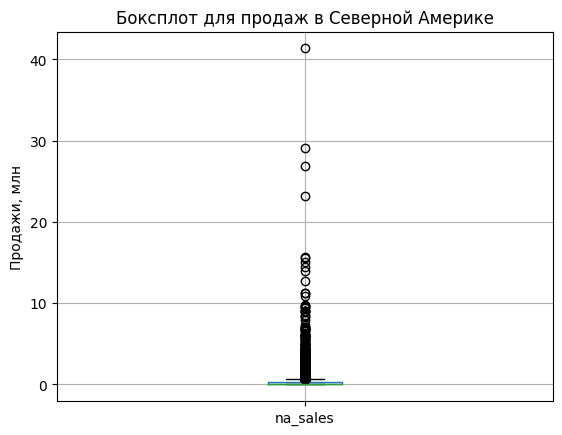

In [23]:
data.boxplot('na_sales')
plt.title('Боксплот для продаж в Северной Америке')
plt.ylabel('Продажи, млн')
plt.show()

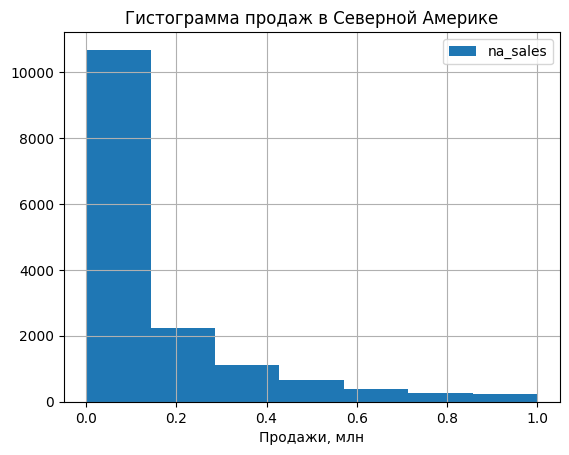

In [24]:
data['na_sales'].hist(bins=7, range=(0,1), legend=True)
plt.title('Гистограмма продаж в Северной Америке')
plt.xlabel('Продажи, млн')
plt.show()

In [25]:
data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Распределение Пуассона с резким спадом. Основная масса игр очень мало продается, и лишь небольшая часть получает огромные продажи. В других регионах ситуация аналогична:

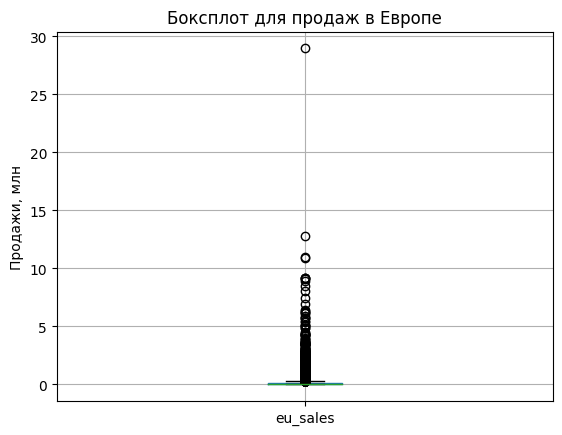

In [26]:
data.boxplot('eu_sales')
plt.ylabel('Продажи, млн')
plt.title('Боксплот для продаж в Европе')
plt.show()

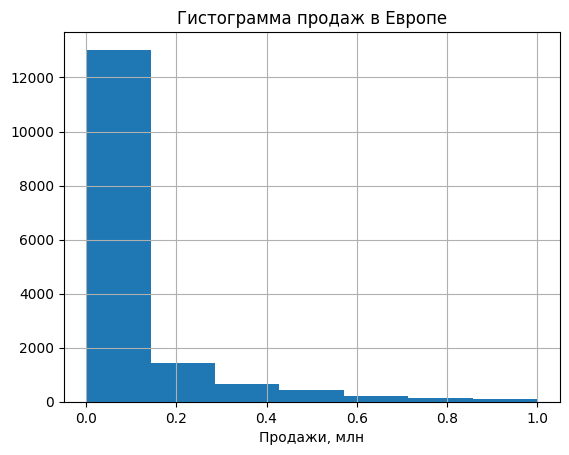

In [27]:
data['eu_sales'].hist(bins=7, range=(0,1))
plt.xlabel('Продажи, млн')
plt.title('Гистограмма продаж в Европе')
plt.show()

In [28]:
data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

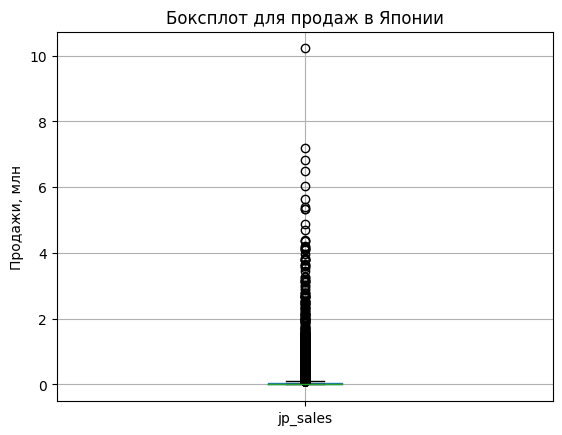

In [29]:
data.boxplot('jp_sales')
plt.ylabel('Продажи, млн')
plt.title('Боксплот для продаж в Японии')
plt.show()

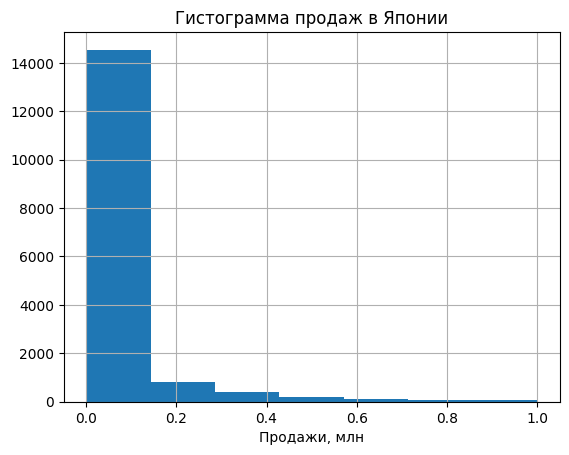

In [30]:
data['jp_sales'].hist(bins=7, range=(0,1))
plt.xlabel('Продажи, млн')
plt.title('Гистограмма продаж в Японии')
plt.show()

In [31]:
data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

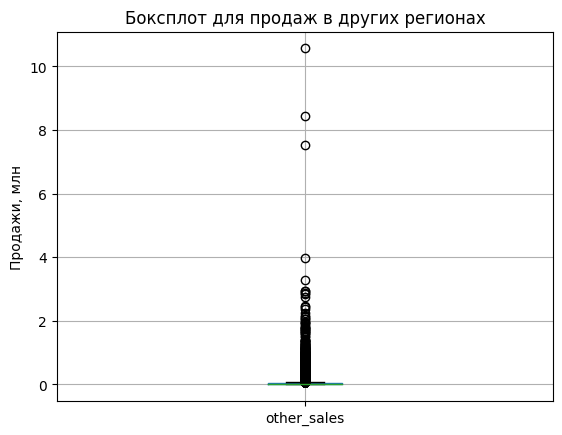

In [32]:
data.boxplot('other_sales')
plt.ylabel('Продажи, млн')
plt.title('Боксплот для продаж в других регионах')
plt.show()

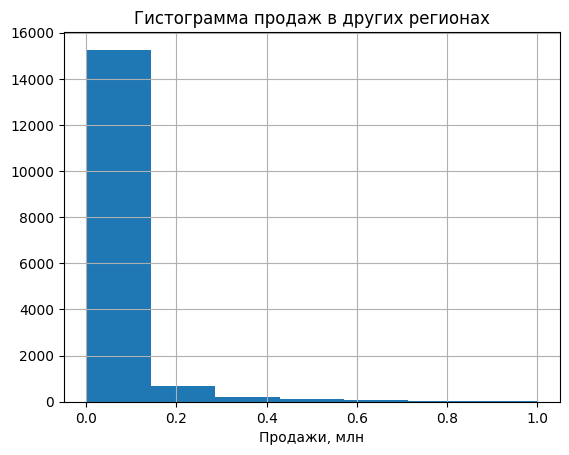

In [33]:
data['other_sales'].hist(bins=7, range=(0,1))
plt.xlabel('Продажи, млн')
plt.title('Гистограмма продаж в других регионах')
plt.show()

In [34]:
data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Проанализируем самый большой регион рынка -- Северная Америка:

In [35]:
data['na_sales'].median()

0.08

Среднее значение для продаж в Северной Америке -- 80 тыс. Основная масса продаж(судя по гистограмме) лежит в диапазоне менее 200 тыс продаж. Будем считать это успехом

In [36]:
data[data['na_sales'] > 0.2]['na_sales'].count() / data['na_sales'].count()

0.2780345414740939

Получается, чтобы сделать продаваемую игру, которая выделяется на рынке, необходимо попасть в 28% лучших

In [37]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

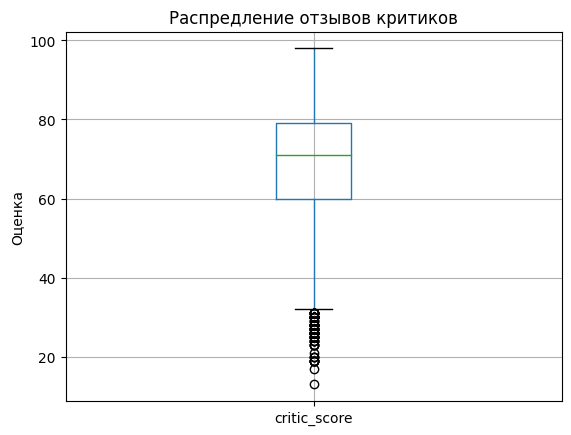

In [38]:
data.boxplot('critic_score')
plt.ylabel('Оценка')
plt.title('Распредление отзывов критиков')
plt.show()

Данные в порядке, в нужном диапазоне без выбросов

In [39]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Судя по описанию из интернета, tbd -- очередной пропуск в значениях

In [40]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В возрастном рейтинге повторов нет, все категории в порядке

Пропуски в рейтинге нельзя заполнить. Их много, поэтому удалять данные не стоит.

In [41]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [42]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [43]:
data.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Предобработка. Столбец суммарных продаж**

In [44]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [45]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


# Исследовательский анализ 

**Исследовательский анализ. Срез по годам**

In [46]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Начина с 2002 года стало выпускаться гораздо больше игр. Период до этого явно не подходит для анализа

In [47]:
data = data[data['year_of_release'] > 2001]

**Исследовательский анализ. Срез по платформам**

In [48]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2     1027.96
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
PSP      289.53
3DS      257.81
GBA      251.28
XB       228.32
PC       195.59
GC       170.39
XOne     159.32
WiiU      82.19
PSV       53.81
PS         8.74
DC         0.35
N64        0.08
Name: sum_sales, dtype: float64

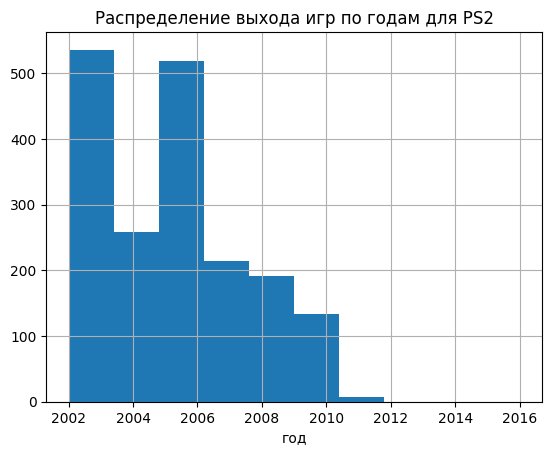

In [49]:
data.loc[data['platform'] == 'PS2', 'year_of_release'].hist(range=(2002, 2016))
plt.title('Распределение выхода игр по годам для PS2')
plt.xlabel('год')
plt.show()

Хоть когда-то игры на PS2 отлично продавались, сейчас эта платформа уже не актуальна

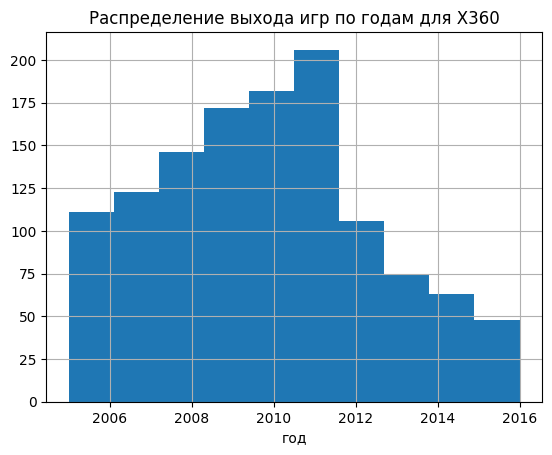

In [50]:
data.loc[data['platform'] == 'X360', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для X360')
plt.xlabel('год')
plt.show()

Не самая современная платформа, но все еще популярная

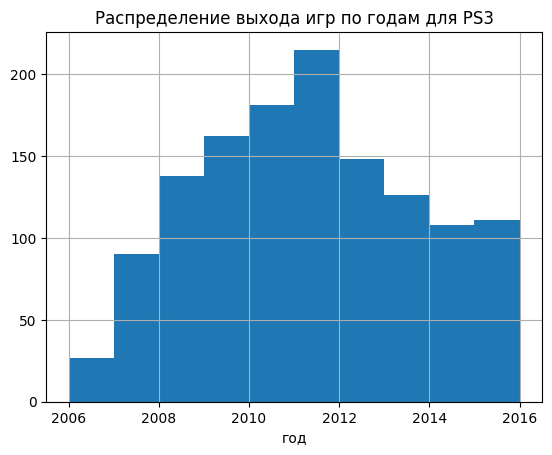

In [51]:
data.loc[data['platform'] == 'PS3', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для PS3')
plt.xlabel('год')
plt.show()

Стабильная платформа, обязательно нужно ее рассмотреть

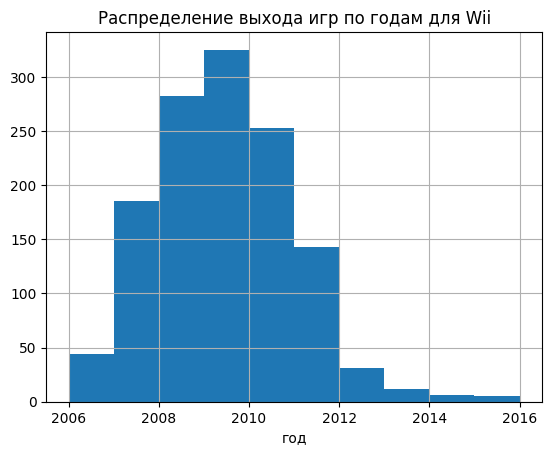

In [52]:
data.loc[data['platform'] == 'Wii', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для Wii')
plt.xlabel('год')
plt.show()

Не актуальна

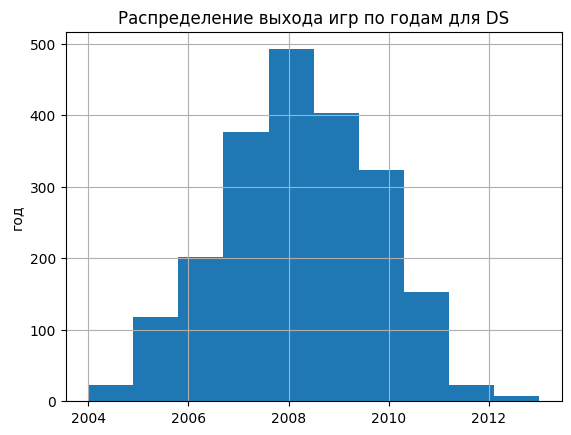

In [53]:
data.loc[data['platform'] == 'DS', 'year_of_release'].hist()
plt.ylabel('год')
plt.title('Распределение выхода игр по годам для DS')
plt.show()

Не актуальна. Что же произошло в 2012 такого, что множество платформ ушли почти полностью?

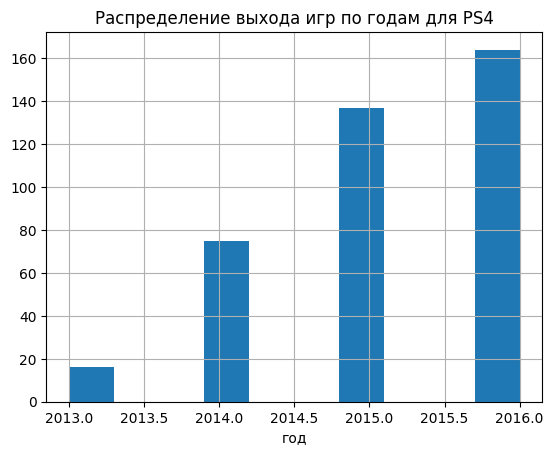

In [54]:
data.loc[data['platform'] == 'PS4', 'year_of_release'].hist()
plt.xlabel('год')
plt.title('Распределение выхода игр по годам для PS4')
plt.show()

А вот и виновник. С выходом 4ой плойки устаревшие платформы совсем забросили

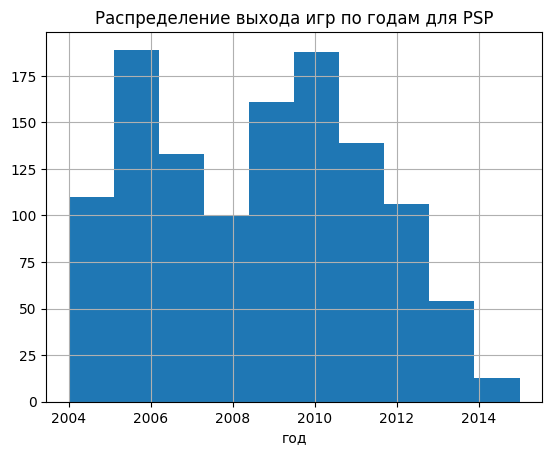

In [55]:
data.loc[data['platform'] == 'PSP', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для PSP')
plt.xlabel('год')
plt.show()

И эта мини-приставка уже не актуальна

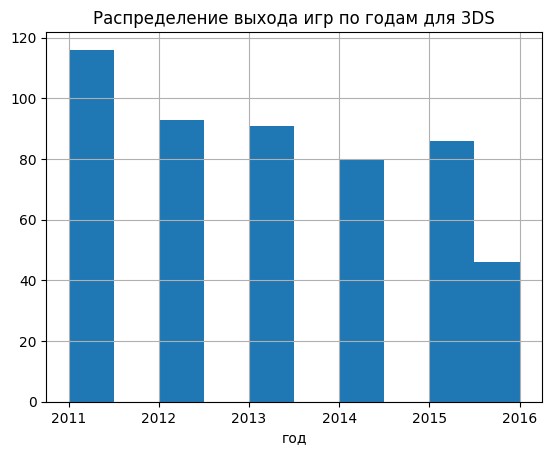

In [56]:
data.loc[data['platform'] == '3DS', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для 3DS')
plt.xlabel('год')
plt.show()

Стабильная платформа, которую необходимо рассмотреть

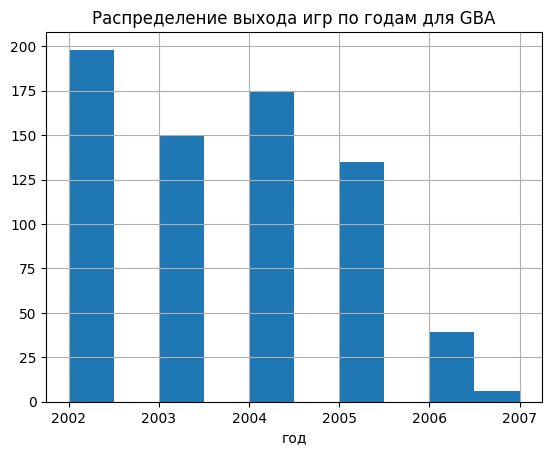

In [57]:
data.loc[data['platform'] == 'GBA', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для GBA')
plt.xlabel('год')
plt.show()

Совсем старая

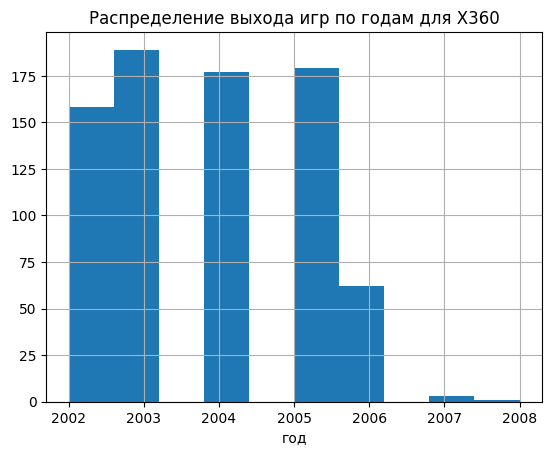

In [58]:
data.loc[data['platform'] == 'XB', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для X360')
plt.xlabel('год')
plt.show()

Также устарело

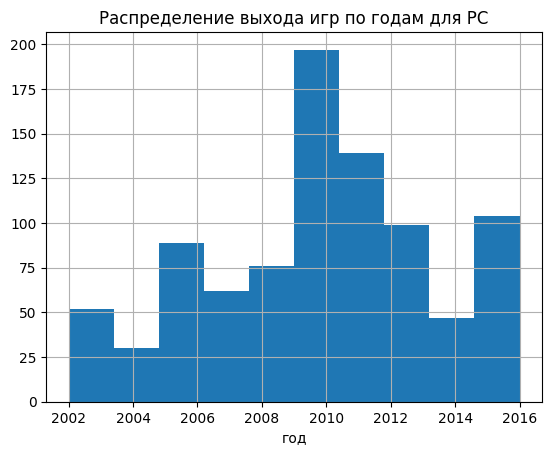

In [59]:
data.loc[data['platform'] == 'PC', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для PC')
plt.xlabel('год')
plt.show()

ПК точно актуален

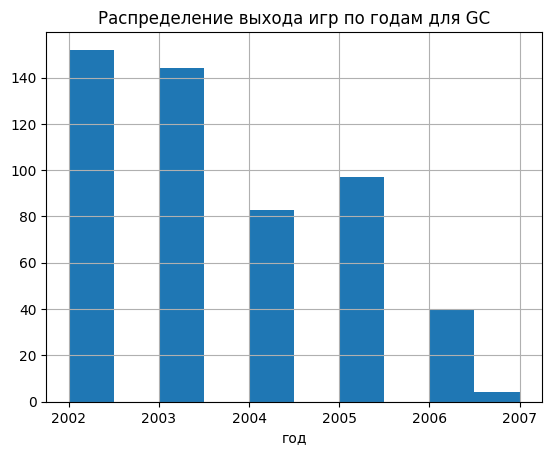

In [60]:
data.loc[data['platform'] == 'GC', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для GC')
plt.xlabel('год')
plt.show()

Старая платформа

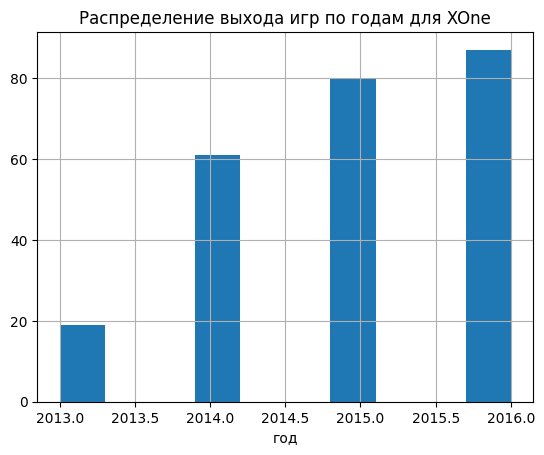

In [61]:
data.loc[data['platform'] == 'XOne', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для XOne')
plt.xlabel('год')
plt.show()

Еще одна платформа нового поколения

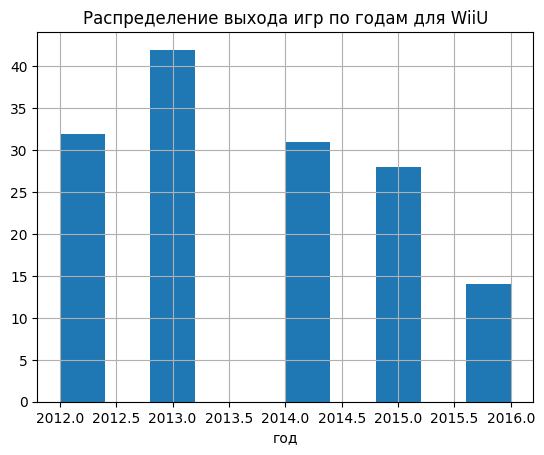

In [62]:
data.loc[data['platform'] == 'WiiU', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для WiiU')
plt.xlabel('год')
plt.show()

Современная платформа нового поколения, еще один виновник создания нового периода

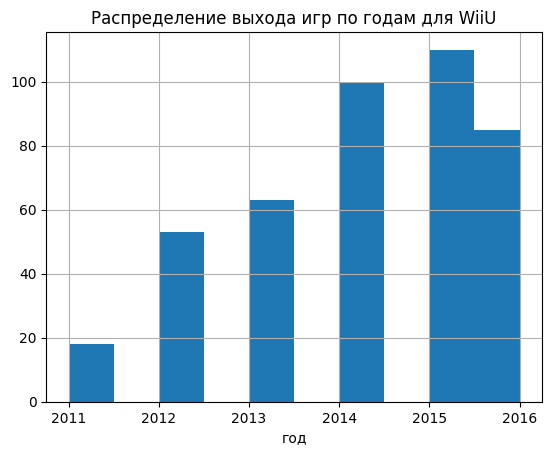

In [63]:
data.loc[data['platform'] == 'PSV', 'year_of_release'].hist()
plt.title('Распределение выхода игр по годам для WiiU')
plt.xlabel('год')
plt.show()

Современная платформа

Вердикт: Множество платформ устарело и для нашего анализа не актуальны. В 2012-2013 годах произошел переход на приставки нового поколения, которые пользуются популярностью и теперь. Значит, рассмаотривать будем именно этот период.

Проведем необходимые срезы:

In [64]:
(data.groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min()).mean()

6.5

In [65]:
(data.groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min()).median()

5.5

Средняя продолжительность жизни платформы -- 6,5 лет,а медиаонная -- 5.5

In [66]:
data = data[data['platform'].isin(('X360', 'PS3', 'PS4', '3DS', 'PC', 'WiiU', 'PSV', 'XOne'))]

In [67]:
data['platform'].unique()

array(['X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'],
      dtype=object)

In [68]:
data = data[data['year_of_release'] > 2011]

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2628 non-null   object 
 1   platform         2628 non-null   object 
 2   year_of_release  2628 non-null   int32  
 3   genre            2628 non-null   object 
 4   na_sales         2628 non-null   float64
 5   eu_sales         2628 non-null   float64
 6   jp_sales         2628 non-null   float64
 7   other_sales      2628 non-null   float64
 8   critic_score     1305 non-null   Int64  
 9   user_score       1507 non-null   float64
 10  rating           2628 non-null   object 
 11  sum_sales        2628 non-null   float64
dtypes: Int64(1), float64(6), int32(1), object(4)
memory usage: 259.2+ KB


Оказывается актуальны нам всего 2381 строки

**Исследовательский анализ. Анализ платформ**

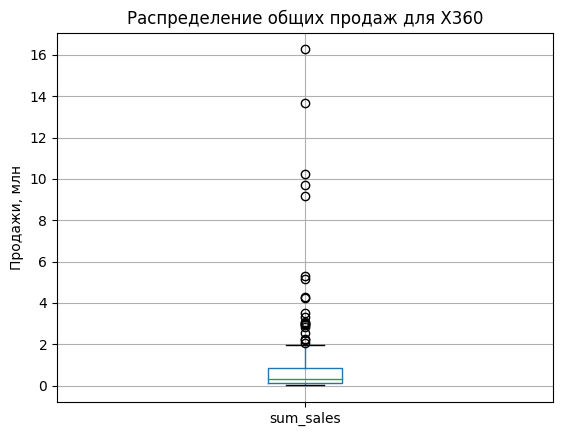

In [70]:
data[data['platform'] == 'X360'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для X360')
plt.show()

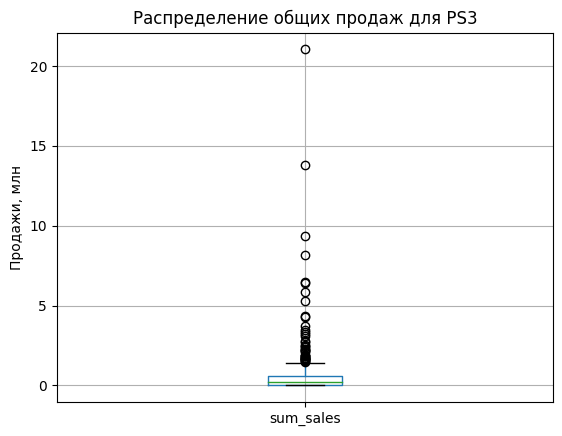

In [71]:
data[data['platform'] == 'PS3'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для PS3')
plt.show()

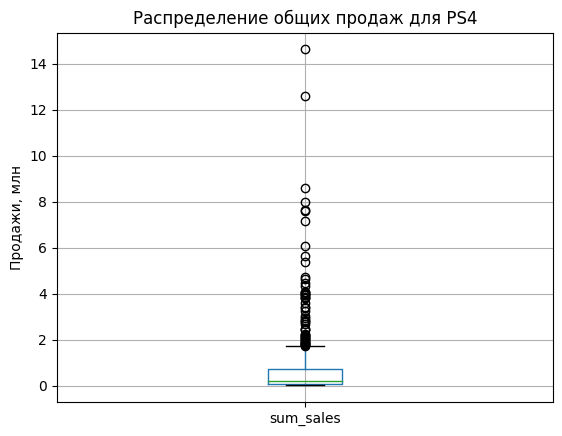

In [72]:
data[data['platform'] == 'PS4'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для PS4')
plt.show()

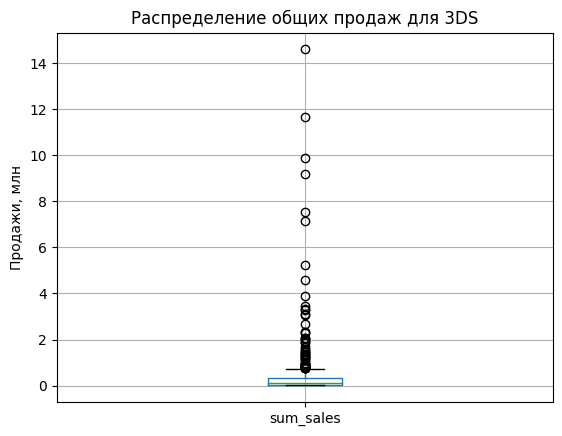

In [73]:
data[data['platform'] == '3DS'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для 3DS')
plt.show()

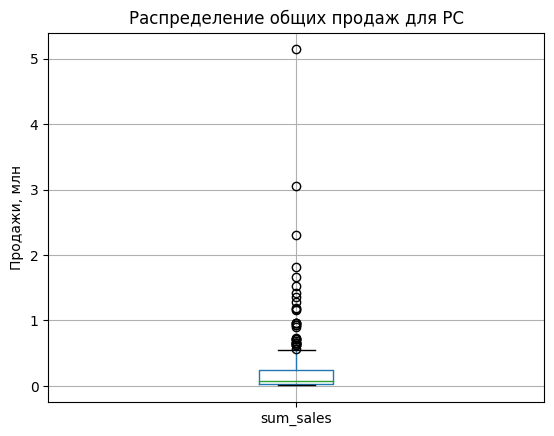

In [74]:
data[data['platform'] == 'PC'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для PC')
plt.show()

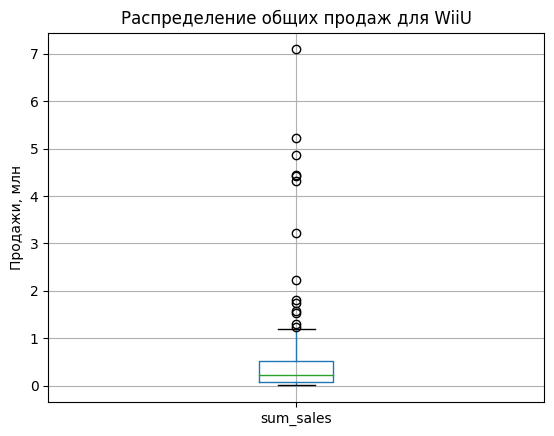

In [75]:
data[data['platform'] == 'WiiU'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для WiiU')
plt.show()

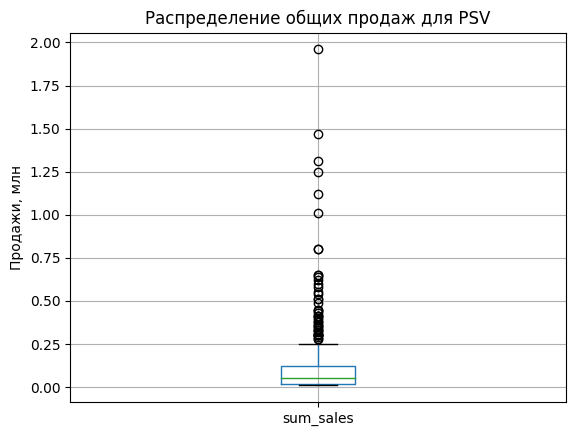

In [76]:
data[data['platform'] == 'PSV'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для PSV')
plt.show()

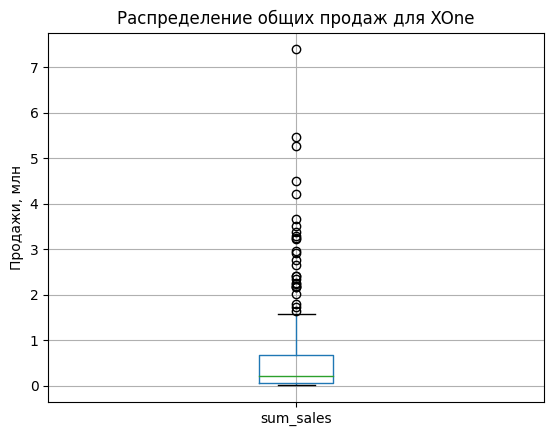

In [77]:
data[data['platform'] == 'XOne'].boxplot('sum_sales')
plt.ylabel('Продажи, млн')
plt.title('Распределение общих продаж для XOne')
plt.show()

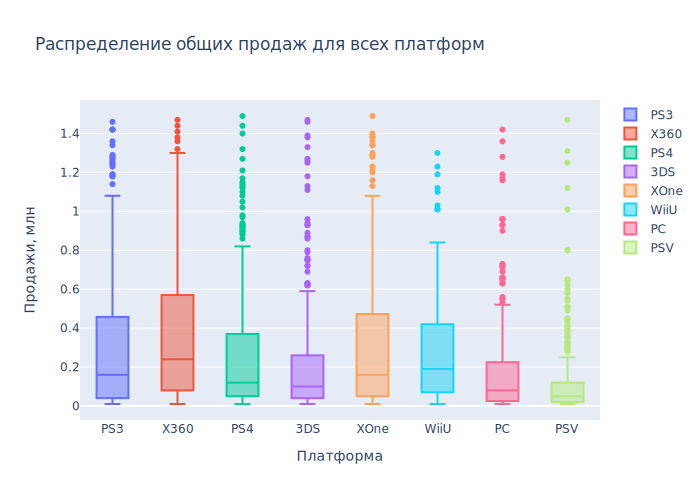

In [78]:
fig = go.Figure()

fig.update_layout(
    title_text='Распределение общих продаж для всех платформ',
    xaxis_title='Платформа',
    yaxis_title='Продажи, млн')

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'PS3') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='PS3'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'X360') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='X360'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'PS4') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='PS4'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == '3DS') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='3DS'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'XOne') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='XOne'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'WiiU') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='WiiU'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'PC') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='PC'))

fig.add_trace(go.Box(
    y=data.loc[(data['platform'] == 'PSV') & (data['sum_sales'] < 1.5), 'sum_sales'],
    name='PSV'))

fig.show("svg")

Везде похожая динамика - узкий основной диапазон большинства продаж до 200 тыс, и длинные хвосты.
Самая однородная зависимость у платформы WiiU
Топ продаж у XOne и PS4
Медианные продажи выше у X360 и приставки нинтендо WiiU

**Исследовательский анализ. Влияние оценок**

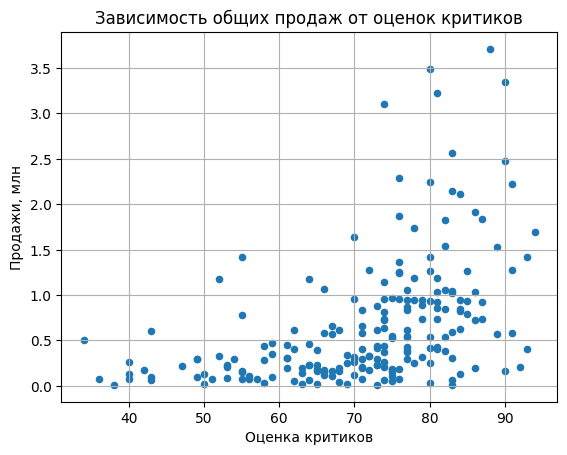

In [79]:
data[(data['platform'] == 'PS3') & (data['sum_sales'] < 5) & (data['critic_score'] > 30)]\
.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True)
plt.title('Зависимость общих продаж от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')

plt.show()

In [80]:
data.loc[(data['platform'] == 'PS3') & (data['sum_sales'] < 5) & (data['critic_score'] > 30), \
         ['critic_score', 'sum_sales']].corr()

,critic_score,sum_sales
critic_score,1.000000,0.459079
sum_sales,0.459079,1.000000


Наблюдается явная положительная корреляция, но не очень сильная. Выоская оценка критиков -- не явный гарант успеха.
Посмотрим, что с пользовательскими отзывами:

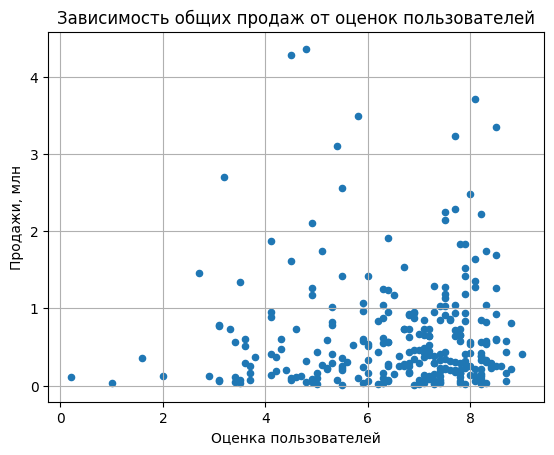

In [81]:
data[(data['platform'] == 'PS3') & (data['sum_sales'] < 5)]\
.plot(x='user_score', y='sum_sales', kind='scatter', grid=True)
plt.title('Зависимость общих продаж от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.show()


In [82]:
data.loc[(data['platform'] == 'PS3') & (data['sum_sales'] < 5), \
         ['user_score', 'sum_sales']].corr()

,user_score,sum_sales
user_score,1.000000,0.027896
sum_sales,0.027896,1.000000


Похоже, что оценки пользователей почти не влияют на итогове продажи игры для данной платформы. Сравним с другими платформами:

In [83]:
for platform in ['X360', 'PS4', '3DS', 'WiiU', 'PC', 'PSV', 'XOne']:
    print(platform)
    print(
    data.loc[(data['platform'] == platform) & (data['sum_sales'] < 5) & (data['critic_score'] > 30), \
         ['critic_score', 'sum_sales']].corr()
    )
    print(
    data.loc[(data['platform'] == platform) & (data['sum_sales'] < 5) & (data['critic_score'] > 30), \
         ['user_score', 'sum_sales']].corr()
    )
    print()

X360
              critic_score  sum_sales
critic_score      1.000000   0.492371
sum_sales         0.492371   1.000000
            user_score  sum_sales
user_score    1.000000   0.127673
sum_sales     0.127673   1.000000

PS4
              critic_score  sum_sales
critic_score      1.000000   0.410449
sum_sales         0.410449   1.000000
            user_score  sum_sales
user_score     1.00000   -0.00166
sum_sales     -0.00166    1.00000

3DS
              critic_score  sum_sales
critic_score      1.000000   0.359583
sum_sales         0.359583   1.000000
            user_score  sum_sales
user_score    1.000000   0.242963
sum_sales     0.242963   1.000000

WiiU
              critic_score  sum_sales
critic_score      1.000000   0.334658
sum_sales         0.334658   1.000000
            user_score  sum_sales
user_score    1.000000   0.374552
sum_sales     0.374552   1.000000

PC
              critic_score  sum_sales
critic_score      1.000000   0.240525
sum_sales         0.240525   1.0000

Для платформ 3DS и WiiU отзывы пользователей значительнее влияют на продажи. 
Для платформы PSV никакие отзывы не влияют

**Исследовательский анализ. Распределение по жанрам**

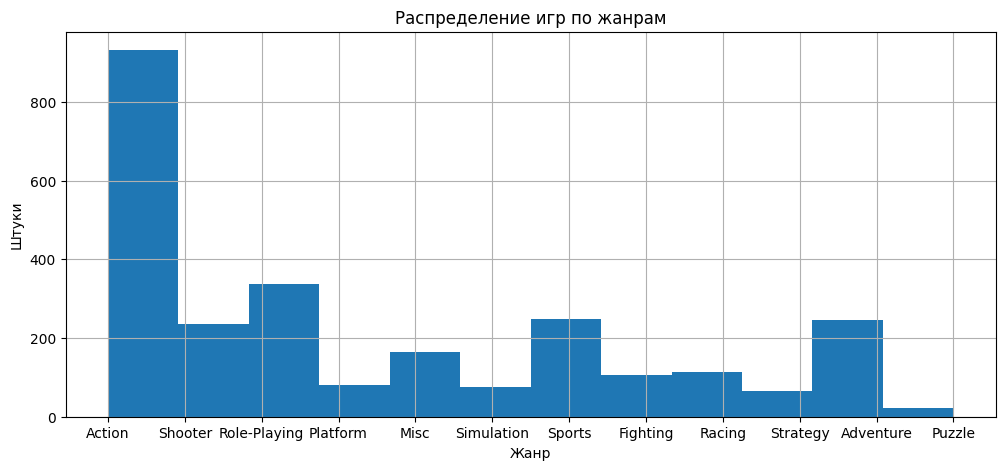

In [84]:
data['genre'].hist(bins=12, figsize=(12,5))
plt.xlabel('Жанр')
plt.ylabel('Штуки')
plt.title('Распределение игр по жанрам')
plt.show()

Больше всего игр в жанре экшен

In [85]:
data.groupby('genre')['sum_sales'].sum()

genre
Action          424.79
Adventure        27.51
Fighting         44.13
Misc             66.29
Platform         58.06
Puzzle            4.13
Racing           53.49
Role-Playing    179.85
Shooter         304.73
Simulation       34.63
Sports          177.44
Strategy         12.37
Name: sum_sales, dtype: float64

Естественно, у них будет больше продаж. 
Интересно, а в соотношении какой жанр будет более прибыльным?

In [86]:
data.groupby('genre')['sum_sales'].mean()

genre
Action          0.455783
Adventure       0.112286
Fighting        0.420286
Misc            0.401758
Platform        0.716790
Puzzle          0.179565
Racing          0.469211
Role-Playing    0.533680
Shooter         1.296723
Simulation      0.455658
Sports          0.712610
Strategy        0.187424
Name: sum_sales, dtype: float64

Оказывается, что немногочисленные жанры шутер, спорт и платформеры приносят очень много продаж. Может быть, у игр именно этого жанра больше шанса на успех? Самое время посмотреть на медиану

In [87]:
data.groupby('genre')['sum_sales'].median()

genre
Action          0.13
Adventure       0.04
Fighting        0.15
Misc            0.13
Platform        0.21
Puzzle          0.05
Racing          0.15
Role-Playing    0.16
Shooter         0.44
Simulation      0.12
Sports          0.26
Strategy        0.08
Name: sum_sales, dtype: float64

Действительно, именно у этих жанров самые высокие медианные показатели. А хуже всего заходят приключения и стратегии

# Пользователи разных регионов

**Топ платформ**

In [88]:
data.groupby('platform')['na_sales'].sum() / data['na_sales'].sum() * 100

platform
3DS      9.723980
PC       3.361463
PS3     18.175105
PS4     19.117440
PSV      1.930380
WiiU     6.698312
X360    24.622011
XOne    16.371308
Name: na_sales, dtype: float64

Cамые популярные платформы -- приставки плейстейшн 3, 4 и иксбокс. Вместе они составляют около 80% всех продаж. Последнее два места из пяти -- приставка Нинтендо. На удивление, продажи на ПК составляют всего 3%. Посмотрим на другие регионы.


In [89]:
data.groupby('platform')['eu_sales'].sum() / data['eu_sales'].sum() * 100

platform
3DS      8.685202
PC       7.691211
PS3     21.765964
PS4     28.738161
PSV      2.313881
WiiU     5.118648
X360    15.178735
XOne    10.508198
Name: eu_sales, dtype: float64

В Европе иксбокс не так популярен. ПК популярнее, но приставка нинтендо все еще обгоняет

In [90]:
data.groupby('platform')['jp_sales'].sum() / data['jp_sales'].sum() * 100

platform
3DS     50.165714
PC       0.000000
PS3     20.165714
PS4      9.120000
PSV     12.022857
WiiU     7.434286
X360     0.897143
XOne     0.194286
Name: jp_sales, dtype: float64

Совершенно другая картина в Японии. Самая распространенная платформа -- приставка Нинтендо, затем идут другие приставки. А иксбокс даже не входит в топ-5

In [91]:
data.groupby('platform')['other_sales'].sum() / data['other_sales'].sum() * 100

platform
3DS      5.809917
PC       3.779393
PS3     28.335626
PS4     31.669614
PSV      3.799044
WiiU     3.897295
X360    13.362154
XOne     9.346957
Name: other_sales, dtype: float64

В остальном мире плейстейшн основная платформа, с сильным отрвом в топ-5 входят иксбок и другие приставки

**Топ жанров**

In [92]:
d = ['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy', 'Adventure', 'Puzzle']
d.sort()
print(d)

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


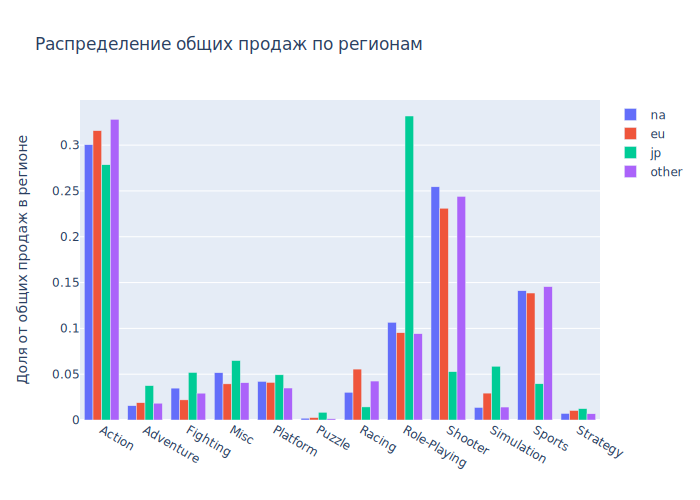

In [93]:
fig = go.Figure()

fig.update_layout(
    title_text='Распределение общих продаж по регионам',
    yaxis_title='Доля от общих продаж в регионе')

fig.add_trace(go.Bar(
    x=d, 
    y=data.groupby('genre')['na_sales'].sum() / data['na_sales'].sum(),
    name='na'))
fig.add_trace(go.Bar(
    x=d, 
    y=data.groupby('genre')['eu_sales'].sum() / data['eu_sales'].sum(), 
    name='eu'))
fig.add_trace(go.Bar(
    x=d,
    y=data.groupby('genre')['jp_sales'].sum() / data['jp_sales'].sum(), 
    name='jp'))
fig.add_trace(go.Bar(
    x=d, 
    y=data.groupby('genre')['other_sales'].sum() / data['other_sales'].sum(), 
    name='other'))
fig.show("svg")

График показывает, что самый популярный жанр вов сех странах — экшен. За ним следуют шутеры и спорт. Примечательно, что в Японии продается значительно больше игр в жанре ролевых, а шутеры наоборот непопулярны. Вывод - в Японии особая аудитория, резко отличающаяся от остального мира

**Влияние рейтинга ESRB на продажи**

In [94]:
data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].median()

,na_sales,eu_sales,jp_sales,other_sales,sum_sales
rating,,,,,
E,0.080,0.06,0.00,0.02,0.230
E10+,0.125,0.10,0.00,0.03,0.295
M,0.155,0.13,0.00,0.04,0.380
T,0.050,0.04,0.01,0.01,0.160
unknown,0.000,0.00,0.03,0.00,0.060


Во всех странах, кроме Японии, игры с рейтингом M продаются лучше. В Японии популярнее всего возрастной рейтинг Т. Незаполненые рейтинги, оказывается, из Японии

# Проверка гипотез

**Равенство средних пользовательских рейтингов на платформах Xbox One и PC**

Сформулируем гипотезы:
Н0 – пользовательские рейтинги одинаковы на иксбокс и пк, 
Н1 – рейтинги различаются.
Критический уровень статистической значимости альфа -- 5%
Метод проверки гипотезы о равенстве средних двух генеральных совокупностей

In [95]:
from scipy import stats as st

alpha = .05

results = st.ttest_ind(
    data.loc[(data['platform'] == 'XOne') & (~data['user_score'].isna()), 'user_score'],
    data.loc[(data['platform'] == 'PC') & (~data['user_score'].isna()), 'user_score']
)

print('p-значение:', results.pvalue)

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Получается, пользователи иксбокс и пк ставят в среднем одинаковые оценки.

**Проверка равенства оценок жанров Action и Sports**

Сформулируем гипотезы:
Н0 – пользовательские рейтинги одинаковы для жанров экшен и спорт, 
Н1 – рейтинги различаются.
Критический уровень статистической значимости альфа -- 5%
Метод проверки гипотезы о равенстве средних двух генеральных совокупностей

In [96]:
alpha = .05

results = st.ttest_ind(
    data.loc[(data['genre'] == 'Action') & (~data['user_score'].isna()), 'user_score'],
    data.loc[(data['genre'] == 'Sports') & (~data['user_score'].isna()), 'user_score']
)

print('p-значение:', results.pvalue)

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.6146519412646e-27
Отвергаем нулевую гипотезу


А вот у жанров ситуация другая – похоже, что у экшена и спорта в среднем разные оценки

# Общий вывод

Представленная база данных содержит информацию о выпускавшихся играх начиная с 1993 года. За много лет игровой рынок успел сильно измениться. Кардинальный переход произошел в 2012-2013 годах с появлением платформ нового поколения. На данный момент, самые популярные игровые приставки Xbox 360, Xbox One, PS3 и PS4. Именно они обладают основным пользовательским охватом. Чтобы как можно больше игроков имели доступ к потенциально успешной игре, она должна присутствовать именно на этих платформах.

На рынке есть огромное количество игр, но подавляющее большинство из них непопулярны. Явной границей от основной массы можно считать продажи в районе 200тыс. Значит, превышение этой отметки указывает на явный успех. Какие параметры влияют на популярность игры?
- Зависимость от оценок. Отметки пользователей на удивление не оказали никакого влияния на продажи. А вот с отметками критиков есть явная корреляция. Для определения потенциала новой игры необходимо обращать внимание именно на реакцию критиков. Неизвестно, что является первопричиной: потенциально успешную игру хвалят критики, или понравившаяся критикам игра становится популярной благодаря их отзывам. Но, поскольку последний вариант возможен, рекламному отделу стоит обратить на это внимание.

- Выбор жанра. Несмотря на то, что экшен игры являются явным лидером рынка, не они стали самыми успешно продаваемыми. Самые большие шансы на продажи у жанров шутер, спорт и платформеры. Похоже, что игровая аудитория именно этих жанров наиболее склонна к покупке. К тому же в этих категориях конкуренция гораздо ниже, значит, и шансов замеченными быть больше.
